In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np

In [69]:
# Load the dataset
data = pd.read_csv('walmart.csv')

# Display the first few rows of the dataset
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [70]:
# Convert 'Purchase' column to numeric, drop rows with missing values in critical columns
data['Purchase'] = pd.to_numeric(data['Purchase'], errors='coerce')
data = data.dropna(subset=['Gender', 'Age', 'Purchase'])

# Print dataset information and row count
count = len(data)
print(f"The total number of rows in the dataset: {count}")

data.info()

The total number of rows in the dataset: 550068
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [71]:
data['User_ID'] = data['User_ID'].astype(str)
data['Product_ID'] = data['Product_ID'].astype(str)
data['Gender'] = data['Gender'].astype(str)
data['Age'] = data['Age'].astype(str)
data['Occupation'] = data['Occupation'].astype(str)
data['City_Category'] = data['City_Category'].astype(str)
data['Marital_Status'] = data['Marital_Status'].astype(str)
data['Product_Cataegory'] = data['Product_Category'].astype(str)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
 10  Product_Cataegory           550068 non-null  object
dtypes: int64(2), object(9)
memory usage: 46.2+ MB


In [72]:
# Total sales by Age
salesByAgeGroup = data.groupby('Age').sum()['Purchase'].reset_index()
salesByAgeGroup = salesByAgeGroup.sort_values(by='Purchase', ascending=False)

salesByAgeGroup

,Age,Purchase
2,26-35,2031770578
3,36-45,1026569884
1,18-25,913848675
4,46-50,420843403
5,51-55,367099644
6,55+,200767375
0,0-17,134913183


In [73]:
# Calculates total sales by gender
genderTotal = data.groupby('Gender')['Purchase'].sum()
genderTotal
genderTotal_df = genderTotal.reset_index()
genderTotal_df.columns = ['Gender', 'Totals']

genderTotal = data.groupby('Gender')['Purchase'].sum()

genderTotal_df

,Gender,Totals
0,F,1186232642
1,M,3909580100


In [74]:
# calculate the total sales across all genders for percentage computation % of sales for each gender
percentageTotal = genderTotal_df['Totals'].sum()

# Compute the percentage of total
genderTotal_df['Percentage'] = (genderTotal_df['Totals'] / percentageTotal) * 100

# rounds by two decimals
genderTotal_df['Percentage'] = genderTotal_df['Percentage'].round(2)
genderTotal_df


,Gender,Totals,Percentage
0,F,1186232642,23.28
1,M,3909580100,76.72


In [75]:
# Total sales by age and gender
salesByAgeGender = data.groupby(['Age', 'Gender']).sum()['Purchase'].reset_index()
salesByAgeGender.columns = ['Age', 'Gender', 'Total Sales']
print("Total Sales by Age and Gender: ")
salesByAgeGender

Total Sales by Age and Gender: 


,Age,Gender,Total Sales
0,0-17,F,42385978
1,0-17,M,92527205
2,18-25,F,205475842
3,18-25,M,708372833
4,26-35,F,442976233
5,26-35,M,1588794345
6,36-45,F,243438963
7,36-45,M,783130921
8,46-50,F,116706864
9,46-50,M,304136539


In [76]:
#Average purchase price per gender
genderGroupPurchase = data.groupby('Gender')['Purchase'].mean().reset_index()
genderGroupPurchase.columns = ['Gender', 'Average Purchase']
genderGroupPurchase

,Gender,Average Purchase
0,F,8734.565765
1,M,9437.526040


In [77]:
#Average purchase price by Age group
genderGroupAge = data.groupby('Age')['Purchase'].mean().reset_index()
genderGroupAge.columns = ['Age', 'Average Purchase']
print("Average Purchase Price by Age Group: ")
genderGroupAge

Average Purchase Price by Age Group: 


,Age,Average Purchase
0,0-17,8933.464640
1,18-25,9169.663606
2,26-35,9252.690633
3,36-45,9331.350695
4,46-50,9208.625697
5,51-55,9534.808031
6,55+,9336.280459


In [78]:
#calculate average purchase price by Age group
genderGroupAge = data.groupby('Age').mean('Purchase')
genderGroupAge

,Product_Category,Purchase
Age,,
0-17,5.083764,8933.464640
18-25,5.111088,9169.663606
26-35,5.314272,9252.690633
36-45,5.494242,9331.350695
46-50,5.742194,9208.625697
51-55,5.774214,9534.808031
55+,6.066313,9336.280459


In [79]:
# Avgerage purchase price by City Category
genderGroupCity = data.groupby('City_Category')['Purchase'].mean().reset_index()
genderGroupCity.columns = ['City Category', 'Average Purchase']
print("Average Purchase Price by City Category: ")
genderGroupCity

Average Purchase Price by City Category: 


,City Category,Average Purchase
0,A,8911.939216
1,B,9151.300563
2,C,9719.920993


In [80]:
# Median purchase price by gender
medianPurchaseByGender = data.groupby('Gender')['Purchase'].mean().reset_index()
medianPurchaseByGender.columns = ['Gender', 'Median Purchase']
medianPurchaseByGender

,Gender,Median Purchase
0,F,8734.565765
1,M,9437.526040


In [81]:
# Total Sales by Product Category
productSales = data.groupby('Product_Category')['Purchase'].sum().reset_index()
productSales = productSales.sort_values(by='Purchase', ascending=False)
productSales.columns = ['Product Category', 'Total Sales']
productSales

,Product Category,Total Sales
0,1,1910013754
4,5,941835229
7,8,854318799
5,6,324150302
1,2,268516186
2,3,204084713
15,16,145120612
10,11,113791115
9,10,100837301
14,15,92969042


In [82]:
cityTotalSales = data.groupby('City_Category')['Purchase'].sum().reset_index()
cityTotalSales.columns = ['City Category', 'Total Purchase']
cityTotalSales

,City Category,Total Purchase
0,A,1316471661
1,B,2115533605
2,C,1663807476


In [83]:
# Top 10 customers by Total Purchases
topCustomers = data.groupby('User_ID')['Purchase'].sum().sort_values(ascending=False).head(10).reset_index()
topCustomers.columns = ['Top 10 Customer IDs', 'Total Purchases']
topCustomers

,Top 10 Customer IDs,Total Purchases
0,1004277,10536909
1,1001680,8699596
2,1002909,7577756
3,1001941,6817493
4,1000424,6573609
5,1004448,6566245
6,1005831,6512433
7,1001015,6511314
8,1003391,6477160
9,1001181,6387961


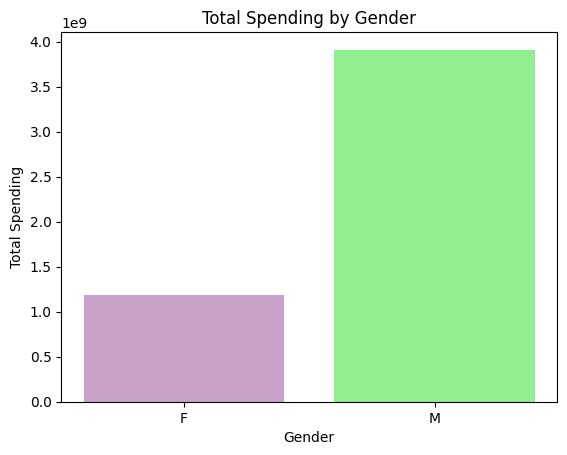

In [84]:
#genderTotal = data.groupby()
# Define the RGBA for light purple and light green
light_purple = (200/255, 162/255, 200/255, 1)  # Normalize RGB values to [0, 1]
light_green = (144/255, 238/255, 144/255)
#RGB(144, 238, 144)
# Create the bar plot
plt.bar(genderTotal_df['Gender'], genderTotal_df['Totals'], color=[light_purple, light_green])
plt.title('Total Spending by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Spending')
plt.show()

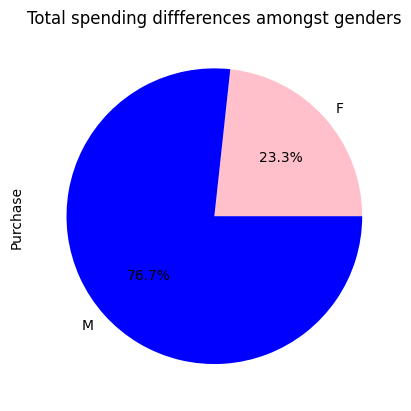

In [85]:
# pie chart showing total sales differences between men and women
genderTotal.plot(
    kind = "pie",
    autopct = "%1.1f%%",
    colors = ["pink", "blue"]
)
plt.title("Total spending diffferences amongst genders")
plt.show()

In [86]:
#calculate the average purchase price per gender and product category
genderGroupPurchase = data.groupby(['Gender']).mean('Purchase')
genderGroupPurchase = pd.DataFrame(genderGroupPurchase['Purchase'])
genderGroupPurchase

,Purchase
Gender,
F,8734.565765
M,9437.526040


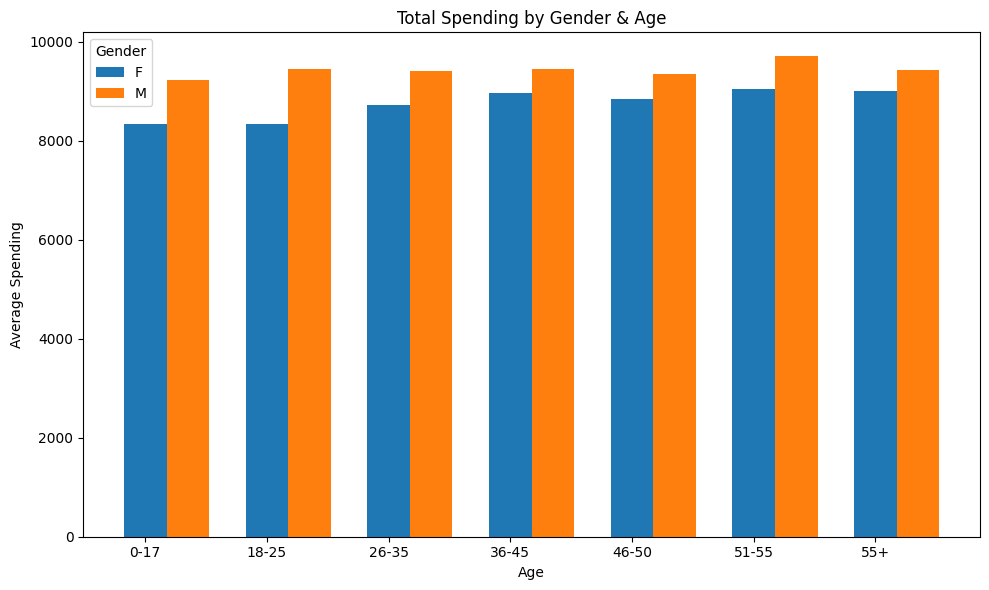

In [87]:
# Grouping the data by Age and Gender, and calculating the mean Purchase
grouped_data = data.groupby(['Age', 'Gender'])['Purchase'].mean().unstack().reset_index()
# Setting the bar width
bar_width = 0.35
X_axis = range(len(grouped_data['Age']))
# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
# Plotting bars for each gender
for i, gender in enumerate(grouped_data.columns[1:]):
    ax.bar([x + (i * bar_width) for x in X_axis],
           grouped_data[gender],
           width=bar_width,
           label=gender)
# Adding labels and title
ax.set_xticks(X_axis)
ax.set_xticklabels(grouped_data['Age'])
ax.set_title('Total Spending by Gender & Age')
ax.set_xlabel('Age')
ax.set_ylabel('Average Spending')
ax.legend(title='Gender')
# Display the chart
plt.tight_layout()
plt.show()

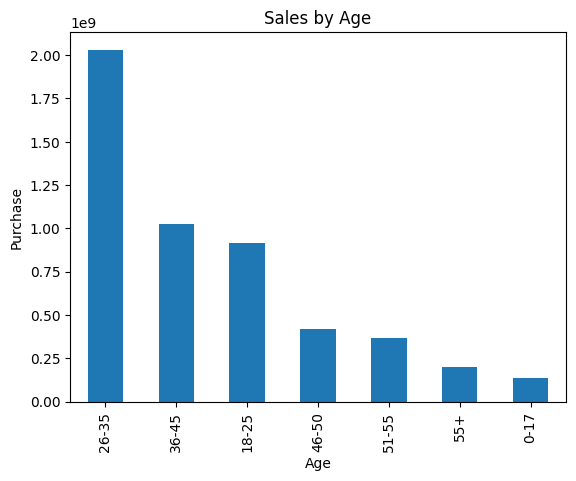

In [88]:
salesByAgeGroup.plot(kind='bar', x='Age', y='Purchase', legend=False)
# Add title and labels
color=('light_purple')
plt.title('Sales by Age')
plt.xlabel('Age')
plt.ylabel('Purchase')
# Show the plot
plt.show()

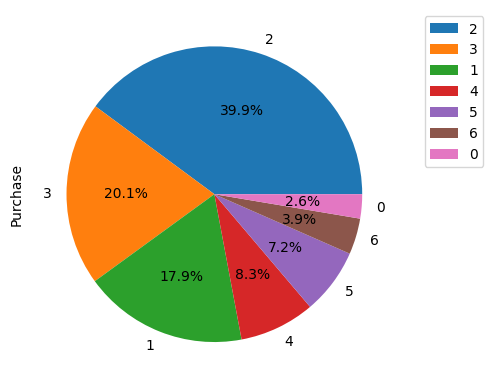

In [89]:
ax=salesByAgeGroup.plot(kind="pie",y="Purchase",autopct="%1.1f%%")
ax.legend(bbox_to_anchor=(1.05,1),loc="upper left")

In [90]:
#Total spend by Marital Status - generally, copy from the Male female spend overview.  Bar Chart. (Amy)
MaritalStatPurchase = data.groupby('Marital_Status').sum('Purchase')
MaritalStatPurchase = pd.DataFrame(MaritalStatPurchase['Purchase'])

#MaritalStatPurchase['Purchase'] = MaritalStatPurchase['Purchase'].map("{:,}".format)

MaritalStatPurchase

,Purchase
Marital_Status,
0,3008927447
1,2086885295


<function matplotlib.pyplot.show(close=None, block=None)>

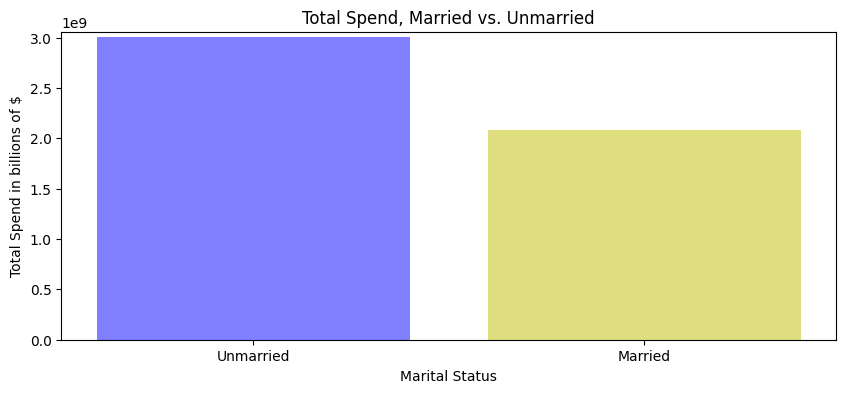

In [91]:
#create graph for marrital status and total purchase
#set x-axis and tick locations
x_axis = ['Unmarried', 'Married']
tick_locations = [value for value in x_axis]
plt.figure(figsize=(10,4))
plt.bar(x_axis, MaritalStatPurchase['Purchase'], color=('b', 'y'), alpha=0.5, align='center')
plt.xticks(tick_locations, rotation='horizontal')
plt.ylim(0, max(MaritalStatPurchase["Purchase"]+50000000))
plt.title("Total Spend, Married vs. Unmarried")
plt.xlabel("Marital Status")
plt.ylabel("Total Spend in billions of $")
plt.show

In [92]:
# overviewe of total spend per product category (Amy/Anna)
#filter the data df for married 
#group df filtered for married by product category
ProdCategorySum = data.groupby(['Product_Category']).sum('Purchase')
ProdCategorySum

,Purchase
Product_Category,
1,1910013754
2,268516186
3,204084713
4,27380488
5,941835229
6,324150302
7,60896731
8,854318799
9,6370324


In [93]:
#calculate the average purchase price per gender and product category
genderGroupPurchasePC = data.groupby(['Gender', 'Product_Category']).mean('Purchase')
genderGroupPurchasePC

Purchase
Gender Product_Category              
F      1                 13597.162619
       2                 11407.496819
       3                 10262.656677
       4                  2454.851882
       5                  6307.239532
       6                 15596.428164
       7                 16394.853659
       8                  7499.924787
       9                 15724.314286
       10                19692.076592
       11                 4676.371808
       12                 1422.909269
       13                  733.846785
       14                13747.362761
       15                14695.326960
       16                14681.491257
       17                 9846.403226
       18                 2848.607330
       19                   37.676275
       20                  371.564315
M      1                 13608.164721
       2                 11203.590520
       3                 10026.550081
       4                  2273.512694
       5                  6214.230729
       6                 15907.851009
       7                 16355.789777
       8                  7498.554419
       9                 15498.888235
       10                19670.731264
       11                 4687.425261
       12                 1305.154037
       13                  718.306092
       14                12722.321111
       15                14797.431350
       16                14793.384056
       17                10209.732558
       18                 2990.168793
       19                   36.793403
       20                  370.052545

<function matplotlib.pyplot.show(close=None, block=None)>

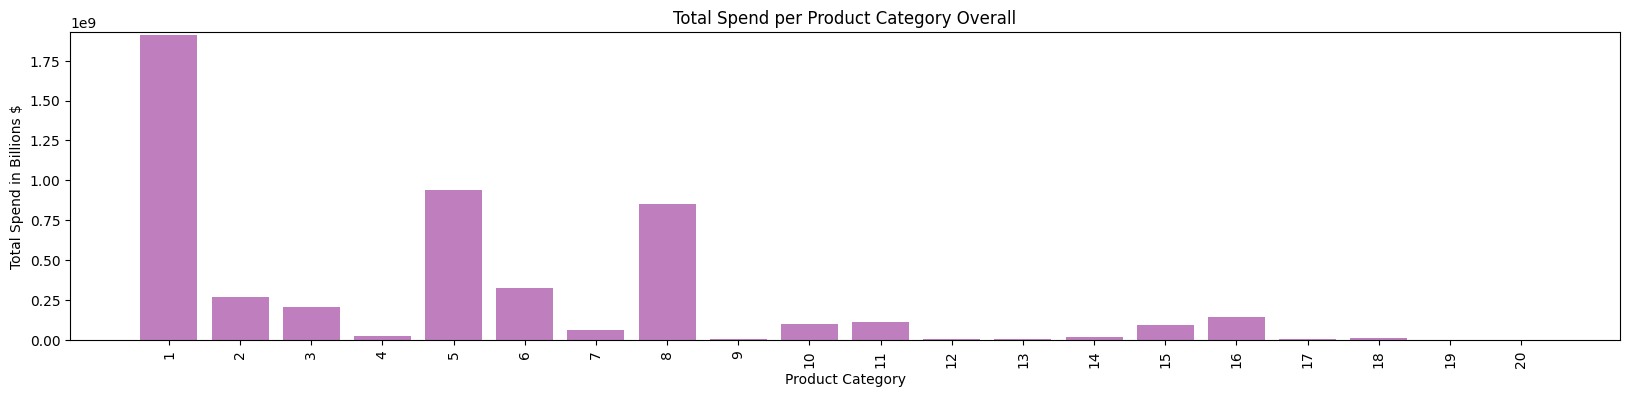

In [94]:
#create graph for shoppers total spend per category
#set x-axis and tick locations
x_axis = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, ProdCategorySum['Purchase'], color=('purple'), alpha=0.5, align='center')
plt.xticks(tick_locations, rotation='vertical')
plt.ylim(0, max(ProdCategorySum["Purchase"]+20000000))
plt.title("Total Spend per Product Category Overall")
plt.xlabel("Product Category")
plt.ylabel("Total Spend in Billions $")

plt.show

In [95]:
# overviewe of average spend per product category (Amy/Anna)
#filter the data df for married 
#group df filtered for married by product category
ProdCategoryMean = data.groupby(['Product_Category']).mean('Purchase')
ProdCategoryMean

,Purchase
Product_Category,
1,13606.218596
2,11251.935384
3,10096.705734
4,2329.659491
5,6240.088178
6,15838.478550
7,16365.689600
8,7498.958078
9,15537.375610


<function matplotlib.pyplot.show(close=None, block=None)>

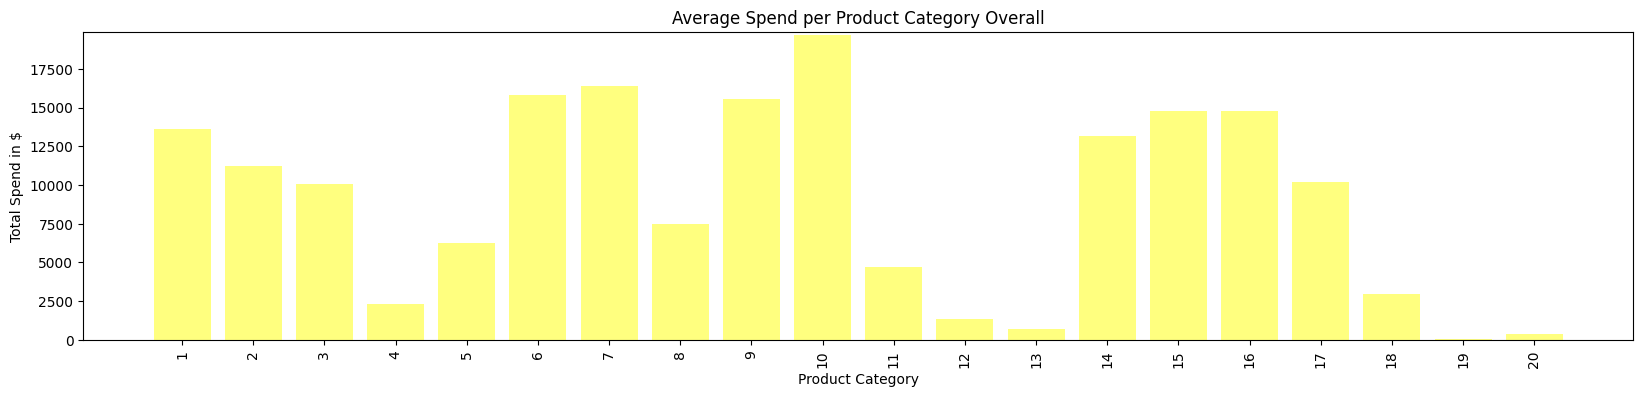

In [96]:
#create graph for shoppers total spend per category
#set x-axis and tick locations
x_axis = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, ProdCategoryMean['Purchase'], color=('yellow'), alpha=0.5, align='center')
plt.xticks(tick_locations, rotation='vertical')
plt.ylim(0, max(ProdCategoryMean["Purchase"]+200))
plt.title("Average Spend per Product Category Overall")
plt.xlabel("Product Category")
plt.ylabel("Total Spend in $")

plt.show

In [97]:
# overviewe of category and marital status (Amy)
#filter the data df for married 
MarriedMeanPurch = data[data['Marital_Status']=='1']

#group df filtered for married by product category
MarriedMeanPurchProd = MarriedMeanPurch.groupby(['Product_Category']).mean('Purchase')
MarriedMeanPurchProd

,Purchase
Product_Category,
1,13631.747621
2,11362.032490
3,10206.497835
4,2363.596809
5,6263.845407
6,15800.245707
7,16307.209994
8,7519.181597
9,15016.760736


In [98]:
UnmarriedMeanPurch = data[data['Marital_Status']=='0']

UnmarriedMeanPurch = UnmarriedMeanPurch.groupby(['Product_Category']).mean('Purchase')
UnmarriedMeanPurch

,Purchase
Product_Category,
1,13589.273979
2,11176.195926
3,10026.934137
4,2308.021318
5,6223.850874
6,15864.705165
7,16413.877941
8,7483.958707
9,15880.939271


<function matplotlib.pyplot.show(close=None, block=None)>

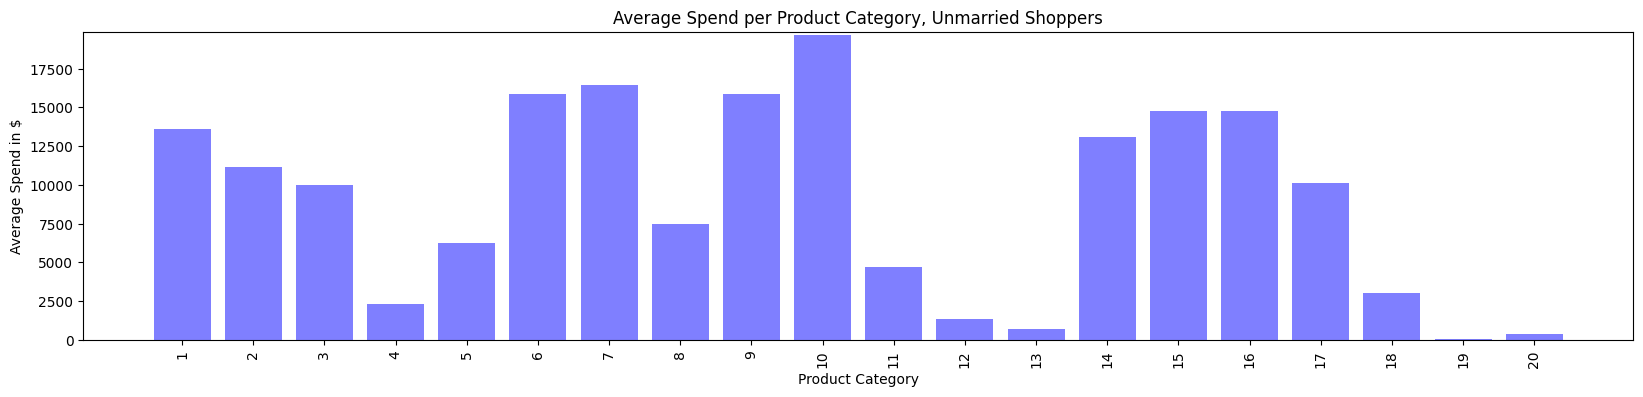

In [99]:
#create graph for unmarried shoppers and averge purcahse
#set x-axis and tick locations
x_axis2 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
tick_locations = [value for value in x_axis2]
plt.figure(figsize=(20,4))
plt.bar(x_axis2, UnmarriedMeanPurch['Purchase'], color=('b'), alpha=0.5, align='center')
plt.xticks(tick_locations, rotation='vertical')
plt.ylim(0, max(UnmarriedMeanPurch["Purchase"]+200))
plt.title("Average Spend per Product Category, Unmarried Shoppers")
plt.xlabel("Product Category")
plt.ylabel("Average Spend in $")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

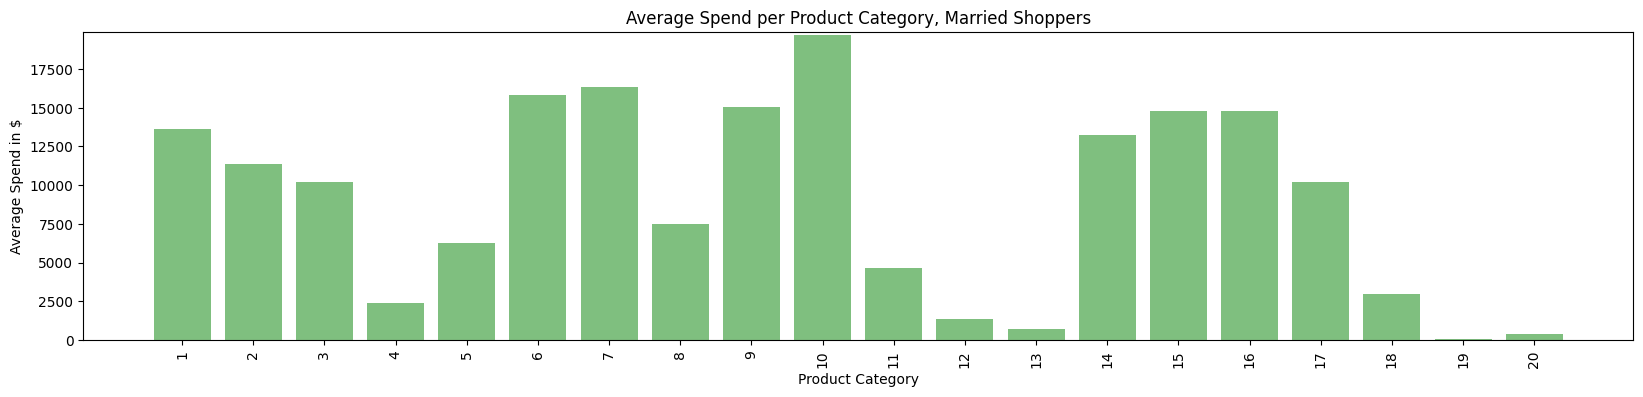

In [100]:
#create graph for married shoppers and averge purcahse
#set x-axis and tick locations
x_axis = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, MarriedMeanPurchProd['Purchase'], color=('g'), alpha=0.5, align='center')
plt.xticks(tick_locations, rotation='vertical')
plt.ylim(0, max(MarriedMeanPurchProd["Purchase"]+200))
plt.title("Average Spend per Product Category, Married Shoppers")
plt.xlabel("Product Category")
plt.ylabel("Average Spend in $")

plt.show

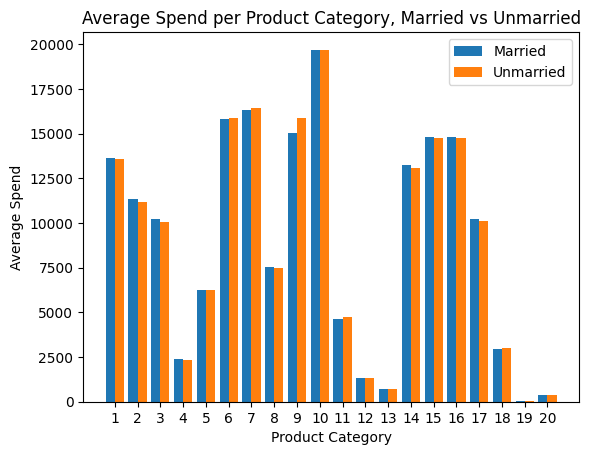

In [101]:
# create a bar graph with multiple bars grouped by product category for married vs unmarried average spend by product category
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_axis = np.arange(len(x))

plt.bar(x_axis -.2, MarriedMeanPurchProd['Purchase'], 0.4, label = "Married")
plt.bar(x_axis +.2, UnmarriedMeanPurch['Purchase'], 0.4, label = "Unmarried")

plt.xticks(x_axis, x) 
plt.xlabel("Product Category") 
plt.ylabel("Average Spend") 
plt.title("Average Spend per Product Category, Married vs Unmarried") 
plt.legend() 
plt.show() 

In [102]:
#subtract married from unmarried
#UnmarriedvsMarriedDiff = UnmarriedMeanPurch - MarriedMeanPurchProd
#UnmarriedvsMarriedDiff
#maxdiff = 

SyntaxError: invalid syntax (654319744.py, line 4)

In [103]:
#Calculate the average purchase amount by Marital Status 
genderGroupMarital_Status = data.groupby('Marital_Status')['Purchase'].mean().reset_index()
genderGroupMarital_Status

,Marital_Status,Purchase
0,0,9265.907619
1,1,9261.174574


In [104]:
genderGroupMarital_Status = pd.DataFrame(
    {
        'Marital_Status': genderGroupMarital_Status['Marital_Status'], 
        'Purchase': genderGroupMarital_Status['Purchase']
    }
)
print(genderGroupMarital_Status) 

  Marital_Status     Purchase
0              0  9265.907619
1              1  9261.174574


In [105]:
# Calculate the total purchase amount by Occupation
genderGroupOccupation = data.groupby('Occupation')['Purchase'].sum()
genderGroupOccupation

Occupation
0     635406958
1     424614144
10    115844465
11    106751618
12    305449446
13     71919481
14    259454692
15    118960211
16    238346955
17    393281453
18     60721461
19     73700617
2     238028583
20    296570442
3     162002168
4     666244484
5     113649759
6     188416784
7     557371587
8      14737388
9      54340046
Name: Purchase, dtype: int64

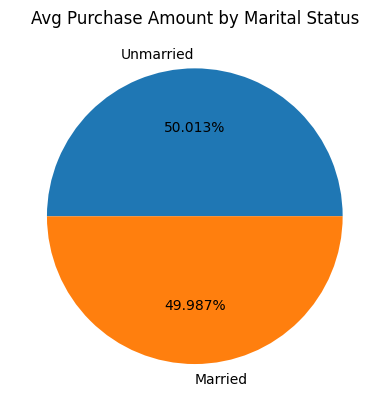

In [106]:
# Create a pie chart based on above data

#Create axes and title 

# plt.title('Avg Purchase Amount by Marital Status')
labels = 'Unmarried', 'Married'
sizes = [9265.91, 9261.17]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,autopct='%1.3f%%')
ax.set_title("Avg Purchase Amount by Marital Status")
plt.show()

In [107]:
# Average spent per city
purchasePerCity = data.groupby('City_Category').mean('Purchase')
purchasePerCity

,Product_Category,Purchase
City_Category,,
A,5.506275,8911.939216
B,5.376181,9151.300563
C,5.354176,9719.920993


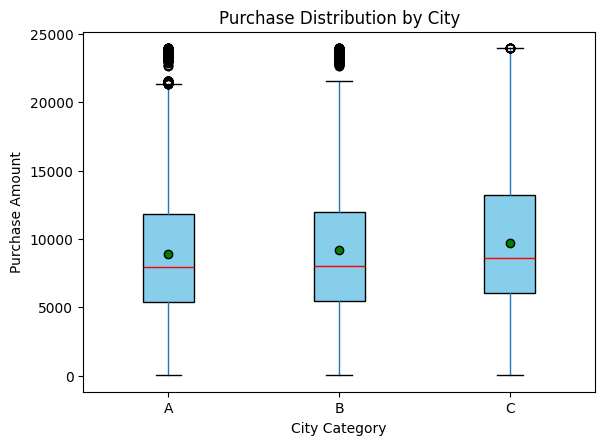

In [108]:

data.boxplot(column='Purchase', by='City_Category', grid=False, showmeans=True, patch_artist=True, 
             boxprops=dict(facecolor="skyblue", color="black"), 
             medianprops=dict(color="red"),
             meanprops=dict(marker="o", markerfacecolor="green", markeredgecolor="black"))

plt.title('Purchase Distribution by City')
plt.suptitle('')  
plt.xlabel('City Category')
plt.ylabel('Purchase Amount')
plt.show()


In [109]:
# Average spent per Number of years lived in a city
purchasePerYearsInCity = data.groupby('Stay_In_Current_City_Years').mean('Purchase')
purchasePerYearsInCity

,Product_Category,Purchase
Stay_In_Current_City_Years,,
0,5.449810,9180.075123
1,5.436934,9250.145923
2,5.346462,9320.429810
3,5.309723,9286.904119
4+,5.465371,9275.598872


In [110]:
# Calculate average purchase grouped by years in the city
purchasePerYearsInCity = data.groupby('Stay_In_Current_City_Years')['Purchase'].mean().reset_index()

# Create a new DataFrame with the required format
spentByYearsInCityDF = pd.DataFrame(
    {
        "Stay In Current City (Years)": purchasePerYearsInCity['Stay_In_Current_City_Years'],
        "Purchase": purchasePerYearsInCity['Purchase']
    }
)

print(spentByYearsInCityDF)


  Stay In Current City (Years)     Purchase
0                            0  9180.075123
1                            1  9250.145923
2                            2  9320.429810
3                            3  9286.904119
4                           4+  9275.598872


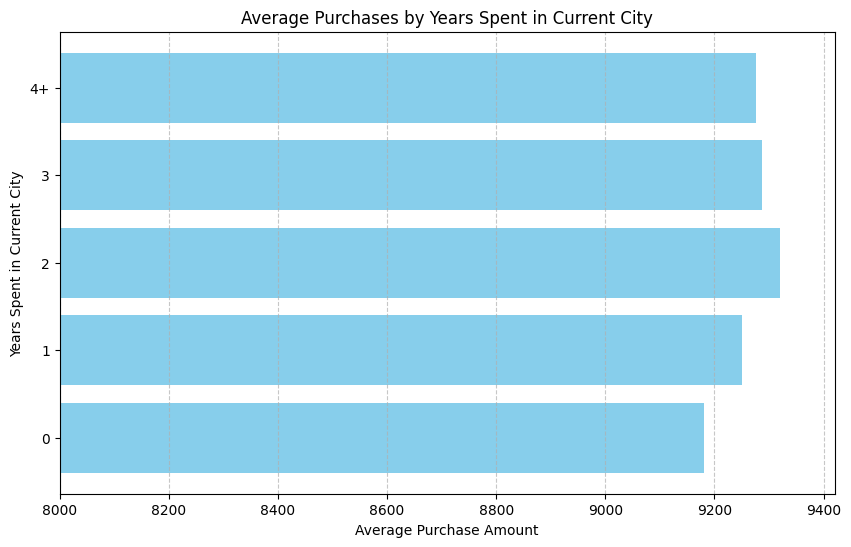

In [111]:
# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(
    spentByYearsInCityDF["Stay In Current City (Years)"], 
    spentByYearsInCityDF["Purchase"], 
    color='skyblue'
)

# Add labels and title
plt.xlabel('Average Purchase Amount')
plt.ylabel('Years Spent in Current City')
plt.title('Average Purchases by Years Spent in Current City')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xlim(8000, max(spentByYearsInCityDF["Purchase"]+100))


# Show the plot
plt.show()


In [119]:
genderTotal = data.groupby('Gender')['Purchase'].mean()

genderTotal

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64